<a href="https://colab.research.google.com/github/mmender2/Auction-House-React/blob/main/EnsLicPl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages and Imports

In [ ]:
!pip install -U openmim --quiet
!mim install mmengine --quiet
!mim install 'mmcv>=2.0.0rc1' --quiet
!mim install 'mmdet>=3.0.0rc0' --quiet
!pip install google-cloud-vision --quiet
!pip install pytesseract Pillow --quiet
!sudo apt install tesseract-ocr --quiet
!pip install pytesseract --quiet
!pip install huggingface-cli --quiet
!huggingface-cli login --quiet
!pip install transformers --quiet
!pip install google-cloud-aiplatform --quiet

In [ ]:
!pip install Levenshtein

In [ ]:
!echo "deb [signed-by=/usr/share/keyrings/cloud.google.gpg] https://packages.cloud.google.com/apt cloud-sdk main" | sudo tee -a /etc/apt/sources.list.d/google-cloud-sdk.list
!apt-get install apt-transport-https ca-certificates gnupg
!wget -qO - https://packages.cloud.google.com/apt/doc/apt-key.gpg | gpg --dearmor -o /usr/share/keyrings/cloud-archive-keyring.gpg
!echo "deb [signed-by=/usr/share/keyrings/cloud-archive-keyring.gpg] http://packages.cloud.google.com/apt cloud-sdk main" | tee -a /etc/apt/sources.list.d/google-cloud-sdk.list
!sudo apt-get update
!sudo apt-get install google-cloud-sdk
!apt-get update -y && apt-get install google-cloud-sdk -y


In [5]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Install the Google Cloud SDK
!curl https://sdk.cloud.google.com | bash --quiet
!gcloud init
!gcloud components update --quiet
!gcloud components install beta --quiet

In [7]:
from google.cloud import aiplatform
#region = !gcloud config get-value compute/region
aiplatform.init(project='fifth-composite-395916', location='us-central1')

In [ ]:
# Download and install Google Cloud SDK
!curl https://sdk.cloud.google.com | bash --quiet

# Add gcloud to PATH
import os
os.environ['PATH'] += ":/root/google-cloud-sdk/bin"

# Authenticate with gcloud
!gcloud auth login


In [ ]:
# Copy the contents from the provided Google Cloud Storage path
!gsutil cp gs://vertex-ai/generative-ai/vision/multimodalembedding/* .

# Install the required Python packages
!pip3 install -r requirements.txt --quiet

In [ ]:
!gcloud config set project 'fifth-composite-395916'
import os
os.environ["GOOGLE_CLOUD_PROJECT"] = "fifth-composite-395916"

In [ ]:
"""from google.colab import files
uploaded = files.upload()"""

In [ ]:
!git clone https://github.com/open-mmlab/mmocr.git --quiet
%cd mmocr
!pip install -v -e . --quiet
# "-v" increases pip's verbosity.
# "-e" means installing the project in editable mode,
# That is, any local modifications on the code will take effect immediately.

In [ ]:
from mmocr.apis import MMOCRInferencer
infer = MMOCRInferencer(rec='svtr-small')

In [ ]:
!pip uninstall protobuf --quiet
!pip install protobuf --quiet
!pip install tensorflow --upgrade --quiet

In [ ]:
!pip install jax --upgrade
!pip install protobuf==3.20.3 --quiet

In [17]:
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten, MaxPooling2D
from keras.models import Model, Sequential
from keras import backend as K
from sklearn.preprocessing import LabelEncoder
import random
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.metrics import pairwise_distances
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Dense, Dropout, LSTM, Bidirectional, Dropout, BatchNormalization
from keras.models import Model
import matplotlib.pyplot as plt
from itertools import combinations
import numpy as np
from mmocr.apis import MMOCRInferencer
import os
from google.cloud import vision
import pytesseract
from PIL import Image
import requests
import warnings
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import re

# Functions and Data Processing

In [44]:
data_path = '/content/drive/MyDrive/LicensePlate/states'
size = (512, 512)

# Function to load and preprocess images
def load_and_preprocess_images(image_paths, target_size=size):
    images = []
    for path in image_paths:
        # Load image and resize it to the target size
        img = load_img(path, target_size=target_size)
        # Convert image to array
        img_array = img_to_array(img)
        images.append(img_array)
    # Normalize the images to [0, 1] range and return
    return images / 255.0

# Function to extract labels from given image paths
def extract_labels_from_paths(paths):
    # Extracts the directory name as label from the path
    return [os.path.basename(os.path.dirname(path)) for path in paths]

# Function to create pairs of images
def create_pairs(images, labels):
    pairs = []
    pair_labels = []

    num_classes = max(labels) + 1
    # Create a list of indices for each label
    class_indices = [np.where(labels == i)[0] for i in range(num_classes)]

    for i in range(len(images)):
        positive_index = i
        # Choose a random index from a different class for negative pairing
        negative_index = np.random.choice(class_indices[(labels[i] + 1) % num_classes])

        # Positive pair and its label
        pairs += [[images[i], images[positive_index]]]
        pair_labels += [1]

        # Negative pair and its label
        pairs += [[images[i], images[negative_index]]]
        pair_labels += [0]

    return np.array(pairs), np.array(pair_labels)

from sklearn.preprocessing import LabelEncoder

def create_metadata(data_path):
    image_paths = []
    labels = []

    # List all files in the data_path directory
    file_names = os.listdir(data_path)

    for file_name in file_names:
        # Check if the file is an image with .png extension
        if file_name.endswith('.png'):
            image_paths.append(os.path.join(data_path, file_name))

            # Assuming file_name is in the format 'state_name.png'
            # Extracting the state name as label by stripping '.png' from the end.
            labels.append(file_name[:-4])

    # Create a DataFrame with image paths and their corresponding labels
    meta_data = pd.DataFrame(
        {
            'image_paths': image_paths,
            'labels': labels
        }, dtype=object
    )
    return meta_data

# Create metadata for the images in the provided data path
data = create_metadata(data_path)
print(data.shape)

# Display a random sample of 5 rows from the metadata
data.sample(5)


(50, 2)


,image_paths,labels
35,/content/drive/MyDrive/LicensePlate/states/okl...,oklahoma
23,/content/drive/MyDrive/LicensePlate/states/mis...,mississippii
22,/content/drive/MyDrive/LicensePlate/states/min...,minnesota
26,/content/drive/MyDrive/LicensePlate/states/neb...,nebraska
12,/content/drive/MyDrive/LicensePlate/states/ill...,illinois


In [ ]:
# Initialize TrOCR
url = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-printed')
# Suppress specific warnings
np.seterr(divide='ignore', invalid='ignore')
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Initialize the MMOCR inferencer without KIE
infer = MMOCRInferencer(det='dbnetpp', rec='svtr-small')
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/drive/MyDrive/LicensePlate/fifth-composite-395916-8a836430659f.json"
# Initialize the Vision client
client = vision.ImageAnnotatorClient()

In [24]:
import string
# Add lowercase letters to the set of characters and regenerate the mapping
all_characters = sorted(set(string.ascii_uppercase + string.ascii_lowercase + string.digits))

char_to_num = {char: i for i, char in enumerate(all_characters)}
num_to_char = {i: char for char, i in char_to_num.items()}

#num_to_char

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def data_generator(data_sample, char_to_num):
    pltI = []  # List to store preprocessed images
    edge = []  # List to store edge-detected images
    labels = []  # List to store the labels associated with each image

    for index, sample in enumerate(data_sample):
        # Extract image path and associated label from the sample
        image_path = sample['image_paths']
        label_text = sample['labels']

        # Read the image in grayscale mode and resize to (512, 512)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (512, 512))

        # Check if image reading was successful
        if image is None:
            print(f"Failed to read image at index {index} with path: {image_path}")
            continue

        # Apply morphological top-hat operation to emphasize light regions against a dark background
        structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        imgTopHat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, structuringElement)

        # Apply morphological black-hat operation to emphasize dark regions against a light background
        imgBlackHat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, structuringElement)

        # Enhance the image by adding the result of the top-hat operation and subtracting the result of the black-hat operation
        imgGrayscalePlusTopHat = cv2.add(image, imgTopHat)
        image = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

        # Apply Gaussian blur to reduce image noise
        img_blurred = cv2.GaussianBlur(image, ksize=(5, 5), sigmaX=0)

        # Apply adaptive thresholding to binarize the image
        thresh_image = cv2.adaptiveThreshold(
            img_blurred,
            255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,
            65,
            2
        )

        # Detect contours in the binarized image
        contours, _= cv2.findContours(
            thresh_image,
            mode=cv2.RETR_LIST,
            method=cv2.CHAIN_APPROX_SIMPLE
        )

        # Initialize a blank image to draw the contours
        temp_result = np.zeros((512, 512), dtype=np.uint8)

        # Draw the detected contours on the blank image
        cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=255, thickness=-1)

        # Invert the image (make black regions white and vice versa)
        inverted_temp_result = cv2.bitwise_not(temp_result)

        # Apply Canny edge detection on the inverted image
        edges = cv2.Canny(inverted_temp_result, 50, 150)

        # Store the preprocessed image, edge-detected image, and label into their respective lists
        pltI.append(inverted_temp_result)
        edge.append(edges)
        labels.append(label_text)

    # Return the lists containing preprocessed images, edge-detected images, and labels
    return pltI, edge, labels


In [46]:
from sklearn.model_selection import train_test_split
from math import ceil

#dataSample = data.sample(n=len(data), random_state=42).reset_index(drop=True)
data_list = data[['image_paths', 'labels']].to_dict('records')

# Split the data_list into training and validation sets (e.g., 80% train, 20% validation)
train_data, val_data = train_test_split(data_list, test_size=0.4, random_state=42)

batch_size = 32
train_steps_per_epoch = len(train_data) // batch_size  # This will give 84
val_steps_per_epoch = len(val_data) // batch_size  # This will give 56

In [47]:
# Create the two generators
#train_gen = data_generator(train_data, char_to_num, batch_size=batch_size)
#val_gen = data_generator(val_data, char_to_num, batch_size=batch_size)
# Test the generators
#train_inputs, train_outputs = next(train_gen)
#val_inputs, val_outputs = next(val_gen)
processed_images, processed_edges, image_labels = data_generator(data_list, char_to_num)
#processed_images, image_labels = data_generator(data_list, char_to_num)

#final_inputs = next(final)


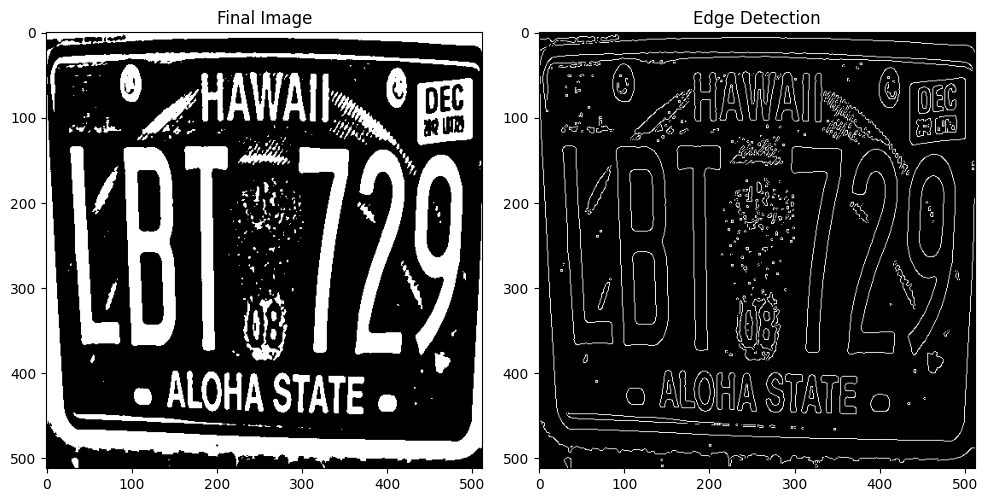

In [48]:
# Display the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(processed_images[10], cmap='gray')
plt.title('Final Image')

plt.subplot(1, 2, 2)
plt.imshow(processed_edges[10], cmap='gray')
plt.title('Edge Detection')

plt.tight_layout()
plt.show()

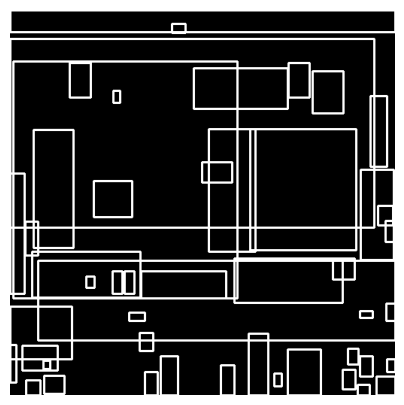

In [53]:
'''

****************** WORK IN POGRESS THE BOX DETECTION STUFF *****************

'''

boxes = []
height, width = 512, 512
contours_dict = []
min_contour_area = 50  # Adjust this value.

for img in processed_images:
    # Initialize a blank image for each processed image
    temp_result = np.zeros((height, width), dtype=np.uint8)

    grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img

    # Morphological operations
    kernel = np.ones((3, 3), np.uint8)
    dilation = cv2.dilate(grayscale_img, kernel, iterations=1)
    erosion = cv2.erode(dilation, kernel, iterations=1)

    contours, _ = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv2.contourArea(contour)
        if area > min_contour_area:  # Only consider contours that are above the minimum area threshold
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)

            # insert to dict
            contours_dict.append({
                'contour': contour,
                'x': x,
                'y': y,
                'w': w,
                'h': h,
                'cx': x + (w / 2),
                'cy': y + (h / 2)
            })
            boxes.append(temp_result)


plt.figure(figsize=(5, 5))
plt.imshow(boxes[10], cmap='gray')
plt.axis('off')
plt.show()


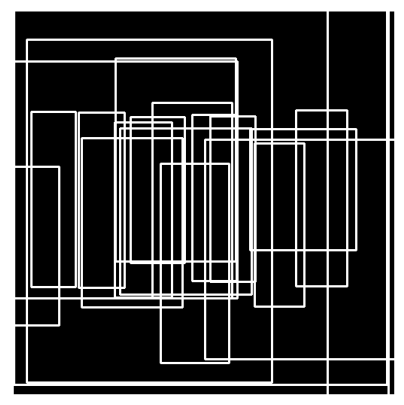

In [52]:
'''

****************** WORK IN POGRESS THE BOX DETECTION STUFF *****************

'''

MIN_AREA = 12500
MIN_WIDTH, MIN_HEIGHT = 2, 8
MIN_RATIO, MAX_RATIO = 0.25, 1.0

possible_contours = []
bx = []
cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']

    if area > MIN_AREA \
    and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt
        cnt += 1
        possible_contours.append(d)

# visualize possible contours
temp_result = np.zeros((height, height), dtype=np.uint8)

for d in possible_contours:
#     cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)
    bx.append(temp_result)
plt.figure(figsize=(5, 5))
plt.imshow(bx[10], cmap='gray')
plt.axis('off')
plt.show()

In [41]:
# List of US States
us_states = [
    'alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado',
    'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois',
    'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
    'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana',
    'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york',
    'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania',
    'rhode island', 'south carolina', 'south dakota', 'tennessee', 'texas', 'utah',
    'vermont', 'virginia', 'washington', 'washingtondc', 'west virginia', 'wisconsin', 'wyoming'
]

In [54]:
from google.cloud import vision
import Levenshtein

# Function to extract texts using Google Cloud Vision API
def get_texts_from_google_vision(img_data):
    texts_list = []  # Initialize an empty list to store the texts

    # Convert the numpy image to bytes
    success, encoded_image = cv2.imencode('.jpg', img_data)
    image_bytes = encoded_image.tobytes()

    client = vision.ImageAnnotatorClient()  # Initialize the Google Cloud Vision client

    image = vision.Image(content=image_bytes)

    # Text Detection using Google Vision API
    response = client.text_detection(image=image)
    texts = response.text_annotations

    # If texts are detected, check if they match any US state name
    if texts:
        for text in texts:
            detected_text = text.description
            if detected_text.lower() in us_states:
                texts_list.append(detected_text)  # Add the detected text to the list
                break

    return texts_list  # Always return a list, even if it's empty

# Function to extract sequences of characters from detected texts
def extract_sequences(img_data, detected_state):
    """Extract sequences of 6 or 7 characters (letters and/or numbers) from the text."""

    # Get sequences from Google Cloud Vision first
    gcv_sequences = get_license_plate_sequences(img_data)
    gcv_sequences = [seq for seq in gcv_sequences if re.search(r'[A-Za-z]', seq) and re.search(r'[0-9]', seq)]

    if gcv_sequences:
        return gcv_sequences

    # Define regex patterns based on detected state
    if detected_state.lower() in ['california', 'new york', 'new jersey']:
        pattern = r'\b\w{5,8}\b'
    else:
        pattern = r'\b\w{5,7}\b'

    # Extract text from TrOCR and then apply regex to extract sequences
    trocr_text = get_text_from_trocr(img_data).lower()
    return re.findall(pattern, trocr_text)

# Function to extract text from an image using TrOCR
def get_text_from_trocr(image_data):
    pil_img = Image.fromarray(image_data)
    inputs = processor(pil_img, return_tensors="pt")
    pixel_values = inputs["pixel_values"]

    # Generate text from the image using the TrOCR model
    generated_ids = model.generate(pixel_values, max_new_tokens=50)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)

    return generated_text[0].strip()

# Function to extract text and its confidence score using Google Vision API
def get_text_from_google_vision2(image_data):
    if isinstance(image_data, np.ndarray):
        is_success, image_buffer = cv2.imencode(".jpg", image_data)
        image_data = image_buffer.tobytes()

    client = vision.ImageAnnotatorClient()  # Initialize the Google Cloud Vision client
    image = vision.Image(content=image_data)
    response = client.text_detection(image=image)

    texts_with_confidence = [{"description": text.description, "confidence": text.confidence} for text in response.text_annotations]

    return texts_with_confidence

# Function to extract text from an image using Tesseract OCR
def get_text_from_tesseract(image_data):
    image = Image.fromarray(image_data)
    text = pytesseract.image_to_string(image).strip()
    return text

# Function to convert a grayscale image to RGB
def grayscale_to_rgb(grayscale_img):
    return np.repeat(grayscale_img[..., np.newaxis], 3, axis=2)

# Function to invert colors of an image
def invert_colors(image):
    return 255 - image

# Function to get multimodal embeddings using AI Platform
def get_multimodal_embeddings(image, text):
    client = aiplatform.gapic.VizierServiceClient(client_options={"api_endpoint": "us-central1-aiplatform.googleapis.com"})

    request = aiplatform.gapic.PredictRequest(
        endpoint="YOUR_ENDPOINT",
        instances=[
            {
                "image": {"content": image},  # Image should be base64 encoded
                "text": text
            }
        ]
    )

    response = client.predict(request)
    embeddings = response.predictions[0]  # Assumes one embedding is returned. Adjust if necessary.
    return embeddings

# Function to extract license plate sequences from an image using Google Vision API
def get_license_plate_sequences(img_data):
    height, width, _ = img_data.shape

    # Crop the middle of the image to focus on the license plate
    top = int(height * 2/5)
    bottom = int(height * 4/5)
    cropped_image = img_data[top:bottom, :]

    _, encoded_image = cv2.imencode('.png', cropped_image)
    image_bytes = encoded_image.tobytes()

    client = vision.ImageAnnotatorClient()  # Initialize the Google Cloud Vision client

    image = vision.Image(content=image_bytes)
    response = client.text_detection(image=image)
    texts = response.text_annotations

    # Filter the detected texts to get potential license plate sequences
    sequences = []
    for text in texts:
        if len(text.description) >= 5 and len(text.description) <= 8:
            sequences.append(text.description)

    if len(sequences) > 1:
        return sequences[0]
    else:
        return sequences

# Function to find the closest matching state to the detected text
def find_closest_state(detected_text, state_list):
    distances = [(state, Levenshtein.distance(detected_text, state)) for state in state_list]
    distances.sort(key=lambda x: x[1])
    return distances[0][0]

# Function to check if detected text is similar to any US state name
def is_similar_to_any_state(detected_text, threshold=0.7):
    closest_state = find_closest_state(detected_text, us_states)
    if closest_state.lower() in detected_text.lower():
        return closest_state.capitalize()
    return None
# Function to set the name of the model used for prediction
def set_model_name(model_name, x):
    if not x:
        x = model_name
    return x
# Function to invert the colors of an image
def invert_colors(img):
    return 255 - img

# Function to convert a grayscale image to RGB format
def grayscale_to_rgb(img):
    if len(img.shape) == 2 or img.shape[2] == 1:  # Check if the image is grayscale
        return cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    return img  # return original image if it's already RGB


# Model

In [56]:
from tqdm import tqdm

# Invert colors of processed images
inverted_image = [invert_colors(img) for img in processed_images]
grayscale_images = inverted_image
# Convert grayscale images to RGB
rgb_images = [grayscale_to_rgb(img) for img in grayscale_images]

predicted_results = {}

# Process each image in the dataset
for index, img_data in tqdm(enumerate(rgb_images), total=len(rgb_images), desc="Processing images"):
    detected_states = set()
    detected_numbers = set()
    x = None
    state_detected = False

    print(f"Starting processing for image {index}")

    # Try to detect text using Google Vision API
    google_texts_results = get_texts_from_google_vision(img_data)
    for text_data in google_texts_results:
        detected_state = is_similar_to_any_state(text_data)
        if detected_state:
            detected_states.add(detected_state)
            x = set_model_name('Google Vision', x)
            state_detected = True
            break

    # If not detected, try MMOCR
    if not state_detected:
        result = infer(img_data, save_vis=False)
        for prediction in result['predictions']:
            rec_texts = prediction.get('rec_texts', [])
            for detected_text in rec_texts:
                detected_state = is_similar_to_any_state(detected_text)
                if detected_state:
                    detected_states.add(detected_state)
                    x = set_model_name('MMOCR', x)
                    state_detected = True
                    break
            if state_detected:
                break

    # If not detected, try Google Vision API again (different function)
    if not state_detected:
        google_vision_texts = get_text_from_google_vision2(img_data)
        for text_data in google_vision_texts:
            detected_text = text_data["description"]
            detected_state = is_similar_to_any_state(detected_text)
            if detected_state:
                detected_states.add(detected_state)
                x = set_model_name('Google Vision 2', x)
                state_detected = True
                break

    # If not detected, try Tesseract OCR
    if not state_detected:
        tesseract_text = get_text_from_tesseract(inverted_image[index]).lower()
        detected_state = is_similar_to_any_state(tesseract_text)
        if detected_state:
            detected_states.add(detected_state)
            x = set_model_name('Tesseract', x)
            state_detected = True

    # If not detected, try TrOCR
    if not state_detected:
        trocr_text = get_text_from_trocr(img_data).lower()
        detected_state = is_similar_to_any_state(trocr_text)
        if detected_state:
            detected_states.add(detected_state)
            x = set_model_name('TrOCR', x)
            state_detected = True

    # If state is still not detected, find the closest matching state
    if not state_detected:
        potential_state = find_closest_state(trocr_text, us_states)
        detected_states.add(potential_state.capitalize())
        x = set_model_name('Similarity Check', x)
        state_detected = True

    if state_detected:
        # Extract license plate numbers using Google Vision
        sequences_found = get_license_plate_sequences(img_data)
        sequences_found = [seq for seq in sequences_found if re.search(r'[A-Za-z]', seq) and re.search(r'[0-9]', seq)]
        if not sequences_found:
            sequences_found = extract_sequences(img_data, list(detected_states)[0] if detected_states else "")

        detected_numbers.update(sequences_found)

    # Store the results
    label_for_image = image_labels[index]
    if label_for_image in predicted_results:  # Checking if label already exists
        label_for_image += f"_{index}"  # Modify the label with index to make it unique

    predicted_results[label_for_image] = {
        'State': list(detected_states) if detected_states else ["NoPrediction"],
        'Number': list(detected_numbers) if detected_numbers else ["NoNumber"],
        'Model': x
    }

    print(f"Saved results for image {label_for_image}")

print('\n')
x = 0
for label, details in predicted_results.items():
    state = ', '.join(details['State'])
    numbers = ', '.join(details['Number'])
    model_used = details['Model']
    if numbers == "NoNumber":
      x += 1
    print(f"Image {label}: State(s) - {state} | Number(s) - {numbers} | Model - {model_used}")
print(x)


Processing images:   0%|          | 0/50 [00:00<?, ?it/s]

Starting processing for image 0


Processing images:   2%|▏         | 1/50 [00:02<01:51,  2.28s/it]

Saved results for image alabama
Starting processing for image 1


Processing images:   4%|▍         | 2/50 [00:04<01:44,  2.19s/it]

Saved results for image alaska
Starting processing for image 2


Output()

Processing images:   6%|▌         | 3/50 [00:10<02:56,  3.76s/it]

Saved results for image arizona
Starting processing for image 3


Processing images:   8%|▊         | 4/50 [00:10<02:02,  2.65s/it]

Saved results for image arkansas
Starting processing for image 4


Processing images:  10%|█         | 5/50 [00:12<01:48,  2.42s/it]

Saved results for image california
Starting processing for image 5


Output()

Processing images:  12%|█▏        | 6/50 [00:16<01:59,  2.71s/it]

Saved results for image colorado
Starting processing for image 6


Processing images:  14%|█▍        | 7/50 [00:18<01:47,  2.51s/it]

Saved results for image connecticut
Starting processing for image 7


Output()

Processing images:  16%|█▌        | 8/50 [00:22<02:09,  3.08s/it]

Saved results for image delaware
Starting processing for image 8


Output()

Processing images:  18%|█▊        | 9/50 [00:26<02:21,  3.45s/it]

Saved results for image florida
Starting processing for image 9


Output()

Processing images:  20%|██        | 10/50 [00:30<02:18,  3.47s/it]

Saved results for image georgia
Starting processing for image 10


Output()

Processing images:  22%|██▏       | 11/50 [00:33<02:11,  3.38s/it]

Output()

Saved results for image hawaii
Starting processing for image 11


Processing images:  24%|██▍       | 12/50 [00:40<02:48,  4.43s/it]

Saved results for image idaho
Starting processing for image 12


Processing images:  26%|██▌       | 13/50 [00:42<02:21,  3.81s/it]

Saved results for image illinois
Starting processing for image 13


Output()

Processing images:  28%|██▊       | 14/50 [00:46<02:16,  3.79s/it]

Saved results for image indiana
Starting processing for image 14


Output()

Processing images:  30%|███       | 15/50 [00:50<02:15,  3.86s/it]

Saved results for image iowa
Starting processing for image 15


Output()

Processing images:  32%|███▏      | 16/50 [00:54<02:12,  3.91s/it]

Saved results for image kansas
Starting processing for image 16


Processing images:  34%|███▍      | 17/50 [00:56<01:52,  3.42s/it]

Saved results for image kentucky
Starting processing for image 17


Processing images:  36%|███▌      | 18/50 [00:58<01:35,  2.98s/it]

Saved results for image louisiana
Starting processing for image 18


Output()

Processing images:  38%|███▊      | 19/50 [01:01<01:26,  2.80s/it]

Saved results for image maine
Starting processing for image 19


Output()

Processing images:  40%|████      | 20/50 [01:05<01:35,  3.19s/it]

Saved results for image maryland
Starting processing for image 20


Processing images:  42%|████▏     | 21/50 [01:05<01:09,  2.40s/it]

Saved results for image massachusetts
Starting processing for image 21


Output()

Processing images:  44%|████▍     | 22/50 [01:09<01:18,  2.79s/it]

Saved results for image michigan
Starting processing for image 22


Output()

Processing images:  46%|████▌     | 23/50 [01:13<01:21,  3.02s/it]

Saved results for image minnesota
Starting processing for image 23


Output()

Processing images:  48%|████▊     | 24/50 [01:18<01:35,  3.66s/it]

Saved results for image mississippii
Starting processing for image 24


Processing images:  50%|█████     | 25/50 [01:20<01:19,  3.18s/it]

Saved results for image missouri
Starting processing for image 25


Output()

Processing images:  52%|█████▏    | 26/50 [01:23<01:13,  3.06s/it]

Saved results for image montana
Starting processing for image 26


Output()

Processing images:  54%|█████▍    | 27/50 [01:27<01:16,  3.31s/it]

Saved results for image nebraska
Starting processing for image 27


Output()

Processing images:  56%|█████▌    | 28/50 [01:31<01:19,  3.63s/it]

Saved results for image nevada
Starting processing for image 28


Output()

Processing images:  58%|█████▊    | 29/50 [01:35<01:20,  3.82s/it]

Saved results for image new hampshire
Starting processing for image 29


Output()

Processing images:  60%|██████    | 30/50 [01:38<01:12,  3.62s/it]

Saved results for image new jersey
Starting processing for image 30


Output()

Processing images:  62%|██████▏   | 31/50 [01:45<01:25,  4.51s/it]

Saved results for image new mexico
Starting processing for image 31


Output()

Processing images:  64%|██████▍   | 32/50 [01:50<01:21,  4.54s/it]

Saved results for image new york
Starting processing for image 32


Output()

Processing images:  66%|██████▌   | 33/50 [01:54<01:17,  4.58s/it]

Saved results for image north carolina
Starting processing for image 33


Output()

Processing images:  68%|██████▊   | 34/50 [02:00<01:20,  5.05s/it]

Saved results for image north dakota
Starting processing for image 34


Output()

Processing images:  70%|███████   | 35/50 [02:04<01:08,  4.60s/it]

Saved results for image ohio
Starting processing for image 35


Output()

Processing images:  72%|███████▏  | 36/50 [02:08<01:01,  4.39s/it]

Saved results for image oklahoma
Starting processing for image 36


Processing images:  74%|███████▍  | 37/50 [02:08<00:41,  3.23s/it]

Saved results for image oregon
Starting processing for image 37


Output()

Processing images:  76%|███████▌  | 38/50 [02:12<00:41,  3.43s/it]

Saved results for image pennsylvania
Starting processing for image 38


Output()

Processing images:  78%|███████▊  | 39/50 [02:16<00:39,  3.57s/it]

Saved results for image rhodeisland
Starting processing for image 39


Output()

Processing images:  80%|████████  | 40/50 [02:18<00:31,  3.15s/it]

Saved results for image south carolina
Starting processing for image 40


Output()

Processing images:  82%|████████▏ | 41/50 [02:22<00:30,  3.40s/it]

Saved results for image south dakota
Starting processing for image 41


Processing images:  84%|████████▍ | 42/50 [02:24<00:23,  2.93s/it]

Saved results for image tennessee
Starting processing for image 42


Output()

Processing images:  86%|████████▌ | 43/50 [02:26<00:18,  2.66s/it]

Saved results for image texas
Starting processing for image 43


Output()

Processing images:  88%|████████▊ | 44/50 [02:29<00:17,  2.85s/it]

Saved results for image utah
Starting processing for image 44


Processing images:  90%|█████████ | 45/50 [02:30<00:10,  2.11s/it]

Saved results for image vermont
Starting processing for image 45


Output()

Processing images:  92%|█████████▏| 46/50 [02:33<00:09,  2.41s/it]

Saved results for image virginia
Starting processing for image 46


Output()

Processing images:  94%|█████████▍| 47/50 [02:37<00:08,  2.84s/it]

Saved results for image washiington
Starting processing for image 47


Processing images:  96%|█████████▌| 48/50 [02:39<00:05,  2.61s/it]

Saved results for image west virgina
Starting processing for image 48


Output()

Processing images:  98%|█████████▊| 49/50 [02:43<00:02,  2.95s/it]

Saved results for image wisconsin
Starting processing for image 49


Output()

Processing images: 100%|██████████| 50/50 [02:46<00:00,  3.33s/it]

Saved results for image wyoming


Image alabama: State(s) - Alabama | Number(s) - bc18351 | Model - Google Vision
Image alaska: State(s) - Alaska | Number(s) - NoNumber | Model - Google Vision
Image arizona: State(s) - Texas | Number(s) - ate3415 | Model - Similarity Check
Image arkansas: State(s) - Arkansas | Number(s) - 013 KTI | Model - Google Vision
Image california: State(s) - California | Number(s) - strmceo | Model - Google Vision
Image colorado: State(s) - Colorado | Number(s) - NoNumber | Model - MMOCR
Image connecticut: State(s) - Connecticut | Number(s) - NoNumber | Model - Google Vision
Image delaware: State(s) - Delaware | Number(s) - 120596 | Model - MMOCR
Image florida: State(s) - Florida | Number(s) - NoNumber | Model - MMOCR
Image georgia: State(s) - Georgia | Number(s) - 99238 | Model - MMOCR
Image hawaii: State(s) - Texas | Number(s) - LB1 729 | Model - Similarity Check
Image idaho: State(s) - Kansas | Number(s) - 482921 | Model - Similarity Check
Image illinois: Sta

# Other stuff i dont want to delete in case i need

In [ ]:
from tqdm import tqdm
# Apply the function to your grayscale image
inverted_image = [invert_colors(img) for img in processed_images]

# Convert grayscale images to RGB format
grayscale_images = inverted_image
rgb_images = [grayscale_to_rgb(img) for img in grayscale_images]

# Initialize an empty dictionary to store detected states and numbers for each image
predicted_results = {}

from tqdm import tqdm

# Initialize the 'x' outside the loop
x = None

for index, img_data in tqdm(enumerate(rgb_images), total=len(rgb_images), desc="Processing images"):
    detected_states = set()
    detected_numbers = set()

    state_detected = False  # Initialize a flag to check if a state is detected

    # Google Vision
    google_texts_results = get_texts_from_google_vision(img_data)
    for text_data in google_texts_results:
        print(text_data)
        detected_states.add(text_data.capitalize())
        x = 'Google Vision'
        state_detected = True
        break

    # MMOCR
    if not state_detected:  # If state is not detected by Google Vision, proceed to MMOCR
        result = infer(img_data, save_vis=False)
        for prediction in result['predictions']:
            rec_texts = prediction.get('rec_texts', [])
            for detected_text in rec_texts:
                for state in us_states:
                    if state.lower() in detected_text.lower():
                        detected_states.add(state.capitalize())
                        x = 'MMOCR'
                        state_detected = True
                        break
            if state_detected:
                break

    # Google Vision 2
    if not state_detected:  # If state is not detected by previous methods, proceed to Google Vision 2
        google_vision_texts = get_text_from_google_vision2(img_data)
        for text_data in google_vision_texts:
            detected_text = text_data["description"]
            for state in us_states:
                if state.lower() in detected_text.lower():
                    detected_states.add(state.capitalize())
                    x = 'Google Vision 2'
                    state_detected = True
                    break
            if state_detected:
                break

    # Tesseract
    if not state_detected:
        tesseract_text = get_text_from_tesseract(inverted_image[index]).lower()
        for state in us_states:
            if state.lower() in tesseract_text and state.capitalize() not in detected_states:
                detected_states.add(state.capitalize())
                x = 'Tesseract'
                state_detected = True
                break

    # TrOCR
    trocr_text = get_text_from_trocr(img_data).lower()
    print(trocr_text)
    if not state_detected:
        for state in us_states:
            if state.lower() in trocr_text and state.capitalize() not in detected_states:
                detected_states.add(state.capitalize())
                x = 'TrOCR'
                state_detected = True
                break

    # If there is a detected state, take the first one. Otherwise, use an empty string.
    state_for_extraction = list(detected_states)[0] if detected_states else ""

    # Extract license plate numbers using Google Vision
    sequences_found = get_license_plate_sequences(img_data)
    sequences_found = [seq for seq in sequences_found if re.search(r'[A-Za-z]', seq) and re.search(r'[0-9]', seq)]

    if not sequences_found:  # If Google Vision failed, use TrOCR
        state_for_extraction = list(detected_states)[0] if detected_states else ""
        sequences_found = extract_sequences(img_data, state_for_extraction)

        if sequences_found and not x:
            x = x

    detected_numbers.update(sequences_found)

    # Store the results
    predicted_results[image_labels[index]] = {
        'State': list(detected_states) if detected_states else ["NoPrediction"],
        'Number': list(detected_numbers) if detected_numbers else ["NoNumber"],
        'Model': x
    }

    # Reset for the next image
    x = None
    state_detected = False

# Print the results
print('\n')
for label, details in predicted_results.items():
    state = ', '.join(details['State'])
    numbers = ', '.join(details['Number'])
    model_used = details['Model']
    print(f"Image {label}: State(s) - {state} | Number(s) - {numbers} | Model - {model_used}")



In [ ]:
print(len(predicted_results))

In [ ]:
def analyze_image(image_path):
    client = vision.ImageAnnotatorClient()
    with open(image_path, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations

    detected_states = []
    detected_numbers = []

    # Regular expression for potential license plate patterns
    license_plate_pattern = re.compile(r'\b[A-Za-z0-9]{5,8}\b')

    # Analyze detected text
    if texts:
        for text in texts:
            detected_text = text.description
            if detected_text.lower() in us_states:
                detected_states.append(detected_text)
            if license_plate_pattern.match(detected_text):
                detected_numbers.append(detected_text)

    # Print results
    if detected_states:
        print("Detected States:", ', '.join(detected_states))
    else:
        print("No state detected.")

    if detected_numbers:
        print("Detected Numbers:", ', '.join(detected_numbers))
    else:
        print("No number detected.")

# Use the function
image_path = '/content/drive/MyDrive/LicensePlate/states/alaska.png'
analyze_image(image_path)


# Multimodel Embedding - Work in progress

In [ ]:
#!python3 predict_request_gapic.py --text 'license plate from alaska' --image_file '/content/drive/MyDrive/LicensePlate/states/alaska.png' --project 'fifth-composite-395916'


EmbeddingResponse(text_embedding=[0.0216732733, -0.00807506777, -0.0108593721, -0.000838947832, 0.0162368361, 0.000222335264, -0.00819236133, 0.0313541703, -0.00647024577, -0.0094154, -0.000764641736, 0.0246840212, -0.0292376783, 0.0153663885, 0.00506238872, 0.0191824045, 0.0251756385, 0.0185546074, 0.00148858421, 0.00543121202, 0.00293678488, 0.00350003317, 0.0187539011, 0.0100120101, 0.0109208347, -0.0181238838, -0.02002443, 0.00627195789, -0.0047960314, -0.0133685051, 0.028200807, 0.0141252475, -0.0133924494, 0.0253215488, -0.0265743397, 0.0219379626, 0.0408052318, -0.018320946, 0.0267020352, -0.00506631285, 0.0209606346, 0.0108232452, -0.00979478564, 0.011969869, 0.0159845259, -0.00679251784, -0.0221450776, 0.0223647617, 0.00272142282, 0.0118014738, -0.0140255215, 0.00942138396, -0.021730125, -0.0194216687, -0.0262423698, -0.00234472798, 0.00409144, -0.047504805, 0.0242771525, -0.000829998171, 0.0286850408, 0.0232986957, 0.00672793388, -0.0132408226, -0.0165270381, -0.0259091873, 0

In [ ]:
#!python3 predict_request_gapic.py --text 'license plate from alaska' --image_file '/content/drive/MyDrive/LicensePlate/states/alaska.png' --project 'fifth-composite-395916'


EmbeddingResponse(text_embedding=[0.0216732733, -0.00807506777, -0.0108593721, -0.000838947832, 0.0162368361, 0.000222335264, -0.00819236133, 0.0313541703, -0.00647024577, -0.0094154, -0.000764641736, 0.0246840212, -0.0292376783, 0.0153663885, 0.00506238872, 0.0191824045, 0.0251756385, 0.0185546074, 0.00148858421, 0.00543121202, 0.00293678488, 0.00350003317, 0.0187539011, 0.0100120101, 0.0109208347, -0.0181238838, -0.02002443, 0.00627195789, -0.0047960314, -0.0133685051, 0.028200807, 0.0141252475, -0.0133924494, 0.0253215488, -0.0265743397, 0.0219379626, 0.0408052318, -0.018320946, 0.0267020352, -0.00506631285, 0.0209606346, 0.0108232452, -0.00979478564, 0.011969869, 0.0159845259, -0.00679251784, -0.0221450776, 0.0223647617, 0.00272142282, 0.0118014738, -0.0140255215, 0.00942138396, -0.021730125, -0.0194216687, -0.0262423698, -0.00234472798, 0.00409144, -0.047504805, 0.0242771525, -0.000829998171, 0.0286850408, 0.0232986957, 0.00672793388, -0.0132408226, -0.0165270381, -0.0259091873, 0